<a href="https://colab.research.google.com/github/natalia0911/Tarea_Practica_3_IA/blob/main/2022_1_Trabajo_Practico_03_NataliaVargas_FabricioElizondo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Primer Semestre 2022**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 03

**Datos de la entrega:** Lunes 30 de mayo 2022, a más tardar a las 11:59 pm

**Estudiantes:**
- Natalia Vanessa Vargas Reyes
- Fabricio Antonio Elizondo Fernández





___

# Nota Introductoria
___

Ustedes han sido contratados por la empresa *SoloIA* para trabajar con dos conjuntos de datos y lograr la mejor predicción posible, dadas ciertas métricas.

Para efectos de dudas o ampliaciones sobre el proyecto, además de lo que se indique en este cuaderno, considere a Luis-Alexánder Calvo-Valverde como su cliente para atender sus consultas.

**IMPORTANTE:** Entre los algoritmos elegidos para las partes 1 y 2, no debe usar ninguno visto en clase.  En caso de duda puede preguntar primero al profesor.

___

# Parte 1  -  Clasificación (50 puntos)
___

### Considere lo siguiente:
1. Conjunto de datos: **cardio.csv**
1. Algunos detalles del conjunto de datos los puede ver en: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset.  **Pero debe usar el conjunto de datos que se le dan adjuntos a este Trabajo Práctico, no descargar otro**.
1. El atributo a predecir es: **cardio**.
1. Proponga al menos dos algoritmos a utilizar
1. Métricas:
    1. Accuracy
    1. Ustedes propongan una más.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso.
    1. Para cada uno de los algoritmos seleccionados: 
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros.
    1. Explicación del diseño experimental por ejecutar. Recuerde que si el algoritmo requiere seleccionar hyperparámetros, hay que dividir en tres conjuntos de datos: Training, Validation, Testing (60%, 20%, 20%). Se le recomienda confirmar con el profesor cuántos y cuáles hyperparámetros validar.
    1. Programación del diseño experimental. 
    1. Tablas de resultados, gráficos y conclusiones de los resultados, recomendando a su contratante cuál algoritmo utilizar, con qué configuración y por qué lo recomienda. 

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

####Análisis del conjunto de datos


In [ ]:
# Se realiza la carga de los datos por utilizar 
dataset = pd.read_csv('cardio.csv', delimiter = ";")

# Se imprimen las dimensiones del arreglo
print(f"Las dimensiones del arreglo cargado son: {dataset.shape}")

#Se muestran los primeros 10 valores del conjunto de datos
dataset.head(10)

Las dimensiones del arreglo cargado son: (69301, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,2,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,3,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,4,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,5,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,6,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,7,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,8,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,9,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,10,22446,1,158,65.0,140,90,3,1,0,0,1,1


####Tipo de dato de los atributos

In [ ]:
# Se realiza una comprobación del tipo de dato de cada columna
print(dataset.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


Como se visualiza a apartir de la información anterior, nos encontramos con un conjunto de datos cuyas características se encuentran representadas por datos numéricos, donde al final del diseño experimental, lo que se busca es predecir el atributo de cardio. Dicho atributo es una variable binaria, lo que nos indica que nos encontramos ante un problema de clasificación binaria. El hecho de que no se presenten datos que no sean numéricos, reduce el trabajo que se debe realizar ante un eventual procesamiento de valores cardinales, transformación de variables binarias, etc.

####Histogramas

A continuación se presenta de forma gráfica, los histogramas que muestren la distribución de los datos para cada uno de los atributos, lo cual nos puede brindar información útil sobre el comportamiento de los mismos, en caso de que se necesite realizar algún tratamiento especial previo a la ejecución de los algoritmos.

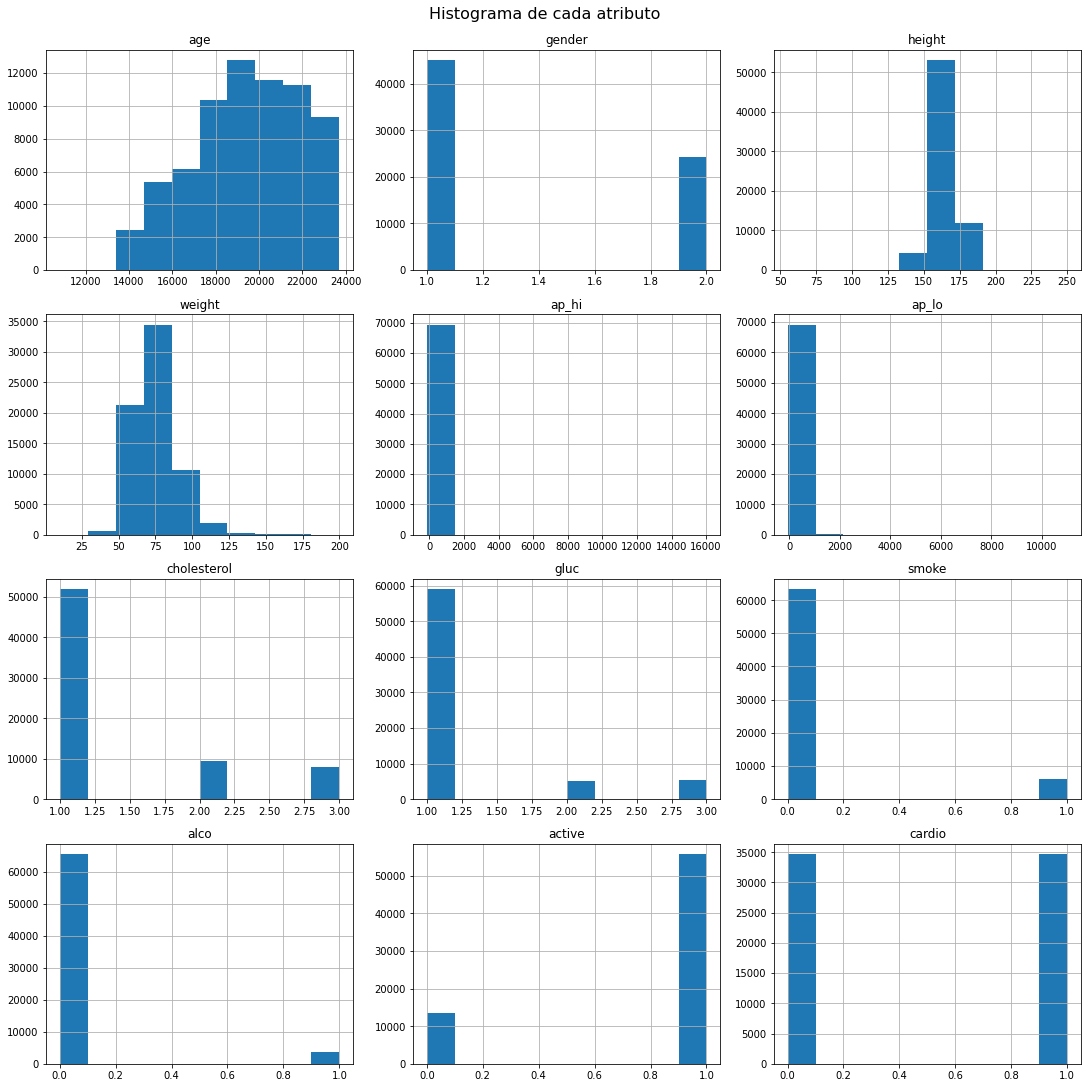

In [ ]:
# Se grafican cada uno de los atributos utilizando un histrograma
fig, axs = plt.subplots(4, 3, constrained_layout=True, figsize=(15,15))
fig.suptitle('Histograma de cada atributo', fontsize=16)

d = 1
for i in range(4):
  for j in range(3):
      axs[i,j].set_title(dataset.columns[d])
      dataset.iloc[:, d].hist(ax=axs[i,j])
      d += 1
plt.show()

De los histogramas anteriores, se puede verificar que contamos con muchos valores binarios como lo son smoke, alco, active y la variable a predecir que es cardio. Gender también es un valor binario con parámetros de clasificación entre 1 y 2. En el caso de ap_hi y ap_lo se encuentran muy compactos en un mismo valor, por lo que no existe una distribución más gaussiana como sí sucede con el parámetro de weight

####Diagrama de cajas y bigotes

A continuación se presentan una serie diagramas de cajas y bigotes, que nos permiten detectar posibles outliers en las variables de interés, por medio de la detección de muestras que se encuentren muy alejadas de la media, y que se pasen de los límites mínimos y máximos.

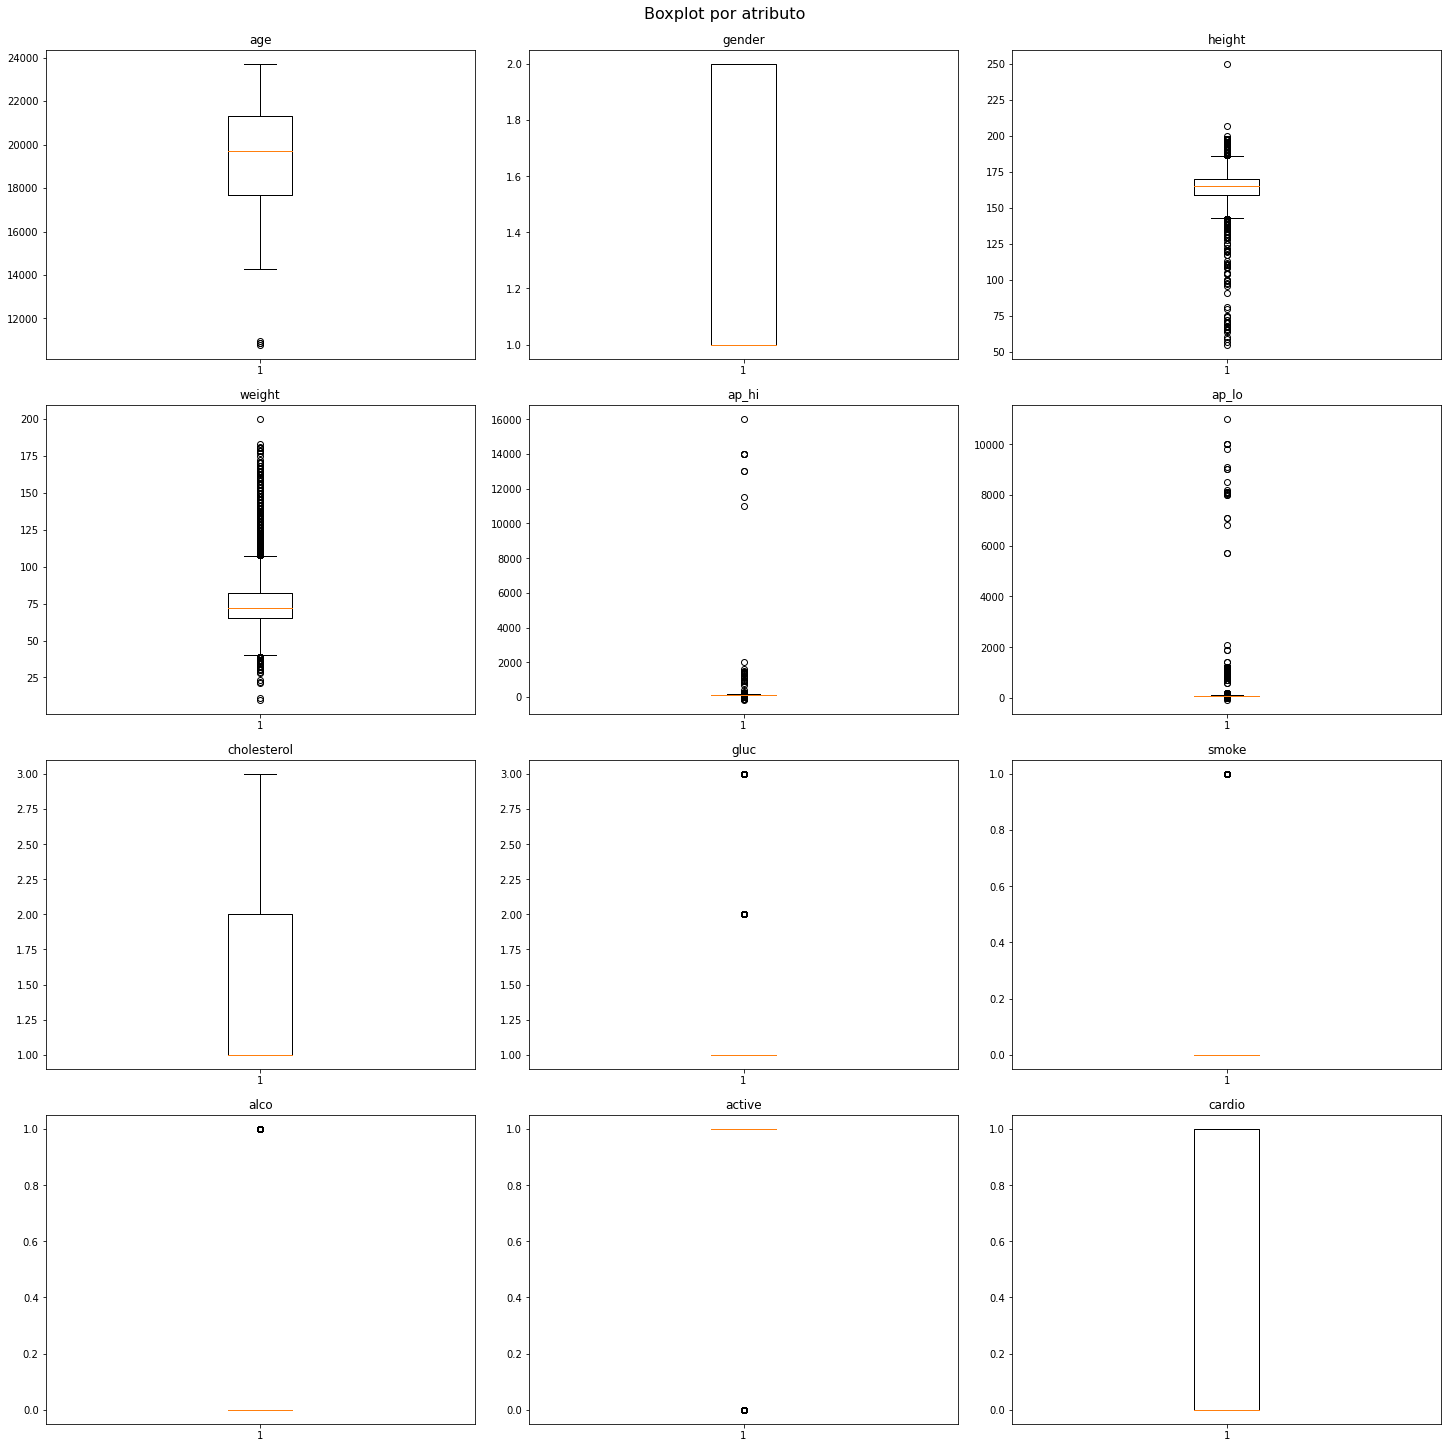

In [ ]:
# Se grafica con un boxplot cada uno de los atributos del dataset
fig, axs = plt.subplots(4, 3, constrained_layout=True, figsize=(20,20))
fig.suptitle('Boxplot por atributo', fontsize=16)

d = 1
for i in range(4):
  for j in range(3):
    axs[i,j].set_title(dataset.columns[d])
    axs[i,j].boxplot(dataset.iloc[:,d])
    d += 1

De los diagramas anteriores se puede comprobar que las variables de height y weight presentan posibles outliers, ya se se separan mucho de la media obtenida para todas las muestras. Lo mismo se puede extrapolar de las variables ap_hi y ap_lo. Por lo que es conveniente realizar un análisis más profundo de las variables para verificar en que escenario nos encontramos y que medidas puede ser conveniente utilizar para tratar los datos antes del diseño experimental.


####Valores faltantes




In [ ]:
print("Cantidad de muestras ",len(dataset), "\n")
print(dataset.count())

Cantidad de muestras  69301 

id             69301
age            69301
gender         69301
height         69301
weight         69301
ap_hi          69301
ap_lo          69301
cholesterol    69301
gluc           69301
smoke          69301
alco           69301
active         69301
cardio         69301
dtype: int64


Como se comprueba con los resultados obtenidos, ninguno de los atributos presenta valores faltantes, por lo que no será necesario realizar algún tipo de tratamiento de los datos en ese apartado.

####Comprobación de los outliers

A continuación se realiza una comprobación más exhaustiva sobre los outliers que se presentan en el conjunto de datos. Por simplicidad del análisis, se omiten la incorporación de atributos a los cuales no se les aplicará ningún tipo de procesamiento como el atributo de id, el cual será descartado posteriormente, y los valores binarios. 

#####Age


---------------- Resumen Estadístico de la variable ----------------
                age
count  69301.000000
mean   19468.786280
std     2467.261818
min    10798.000000
25%    17664.000000
50%    19704.000000
75%    21326.000000
max    23713.000000
-----------------Ver outliers -----------------
442      14307
915      14369
1073     14365
1350     14359
1836     14366
         ...  
67754    14324
67800    14352
68004    14345
68179    14326
68945    14332
Name: age, Length: 209, dtype: int64
25       23587
122      23616
204      23606
582      23578
607      23604
         ...  
68130    23605
68443    23677
68657    23578
68976    23620
69166    23646
Name: age, Length: 208, dtype: int64


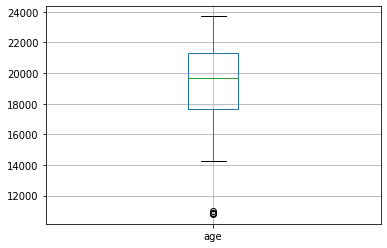

In [ ]:
data = pd.DataFrame(dataset.age)
data.boxplot()

print("---------------- Resumen Estadístico de la variable ----------------")
print(data.describe())

values = dataset.age
print("-----------------Ver outliers -----------------")
#Imprimir valores que se encuentren entre dichos cuartiles
print(values[values.between(values.quantile(0), values.quantile(.003))] )
print(values[values.between(values.quantile(.997), values.quantile(1))] )

Con los datos obtenidos para el atributo de age, se demuestra que existen algunos valores que se consideran outliers. De acuerdo con la información del conjunto de datos, este valor de edad viene representado en formato de días, por lo que sí será necesario aplicar un escalamiento de los datos para evitar problemas con futuros datos de prueba. Pero con respecto a los outliers se toma la decisión de no removerlos del conjunto de datos, ya que los valores que se detectaron se encuentran alejados de la media, pero no corresponden con edades irreales o que no tengan sentido, por lo que se procede a dejarlos como están.

####Height

---------------- Resumen Estadístico de la variable ----------------
             height
count  69301.000000
mean     164.362217
std        8.205337
min       55.000000
25%      159.000000
50%      165.000000
75%      170.000000
max      250.000000
-----------------Ver outliers -----------------
82       141
349      140
1713     138
2245     134
2433     140
        ... 
67626    140
68353    120
68425    138
68731    140
69085    141
Name: height, Length: 220, dtype: int64
328      195
418      198
720      187
1461     196
1504     187
        ... 
68517    190
68592    187
68776    187
68890    192
69174    188
Name: height, Length: 267, dtype: int64


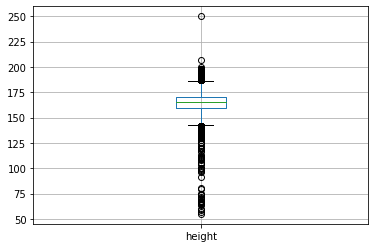

In [ ]:
data = pd.DataFrame(dataset.height)
data.boxplot()

print("---------------- Resumen Estadístico de la variable ----------------")
print(data.describe())

values = dataset.height
print("-----------------Ver outliers -----------------")
#Imprimir valores que se encuentren entre dichos cuartiles
print(values[values.between(values.quantile(0), values.quantile(.003))] )
print(values[values.between(values.quantile(.997), values.quantile(1))] )

Para el caso del atributo relacionado a la estatura de las personas, también se detectan outliers. Es recomendable aplicar un escalamiento de los datos para evitar posibles conflictos que se presenten con los datos de pruebas. Se toma la decisión de no remover los outliers detectados, ya que aunque se separan del valor de la media, no corresponden con estaturas dadas en cm que sean irreales.

####Weight

---------------- Resumen Estadístico de la variable ----------------
             weight
count  69301.000000
mean      74.203027
std       14.383469
min       10.000000
25%       65.000000
50%       72.000000
75%       82.000000
max      200.000000
-----------------Ver outliers -----------------
138      42.0
875      43.0
1563     40.0
1773     40.0
1823     41.0
         ... 
68821    43.0
68823    43.0
69035    43.0
69152    42.0
69209    42.0
Name: weight, Length: 235, dtype: float64
498      139.0
571      150.0
577      138.0
700      131.0
899      150.0
         ...  
66229    134.0
66422    146.0
66458    131.0
66736    147.0
68410    155.0
Name: weight, Length: 253, dtype: float64


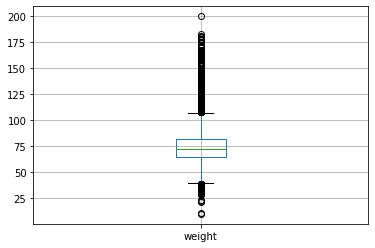

In [ ]:
data = pd.DataFrame(dataset.weight)
data.boxplot()

print("---------------- Resumen Estadístico de la variable ----------------")
print(data.describe())

values = dataset.weight
print("-----------------Ver outliers -----------------")
#Imprimir valores que se encuentren entre dichos cuartiles
print(values[values.between(values.quantile(0), values.quantile(.003))] )
print(values[values.between(values.quantile(.997), values.quantile(1))] )

Para el atributo del peso, se toman las mismas decisiones que con respecto al atributo de la estatura, ya que se presentan las mismas condiciones. 

####ap_hi

De acuerdo con la información del conjunto de datos, este atributo representa mediciones hechas a las personas sobre la presión sistólica de sangre. Los outliers detectados muestan valores irreales que puede llegar a tener una persona sobe esta métrica de caracter médico, por lo que en adición a realizar un escalado de los datos, similar a los otros atributos, también se recomienda remover esos outliers detectados, para obtener un conjunto de datos que tenga mayor sentido a la hora de aplicar los algoritmos de clasificación. 

---------------- Resumen Estadístico de la variable ----------------
              ap_hi
count  69301.000000
mean     128.829584
std      154.775805
min     -150.000000
25%      120.000000
50%      120.000000
75%      140.000000
max    16020.000000
-----------------Ver outliers -----------------
228      14
280      11
901      12
928      14
1073     11
         ..
68043    14
68299    14
68438    12
68566    80
68850    13
Name: ap_hi, Length: 307, dtype: int64
629       220
1177      902
1315      906
1443      210
1579      220
         ... 
67880     220
67964     906
68630     240
68671    2000
69195     200
Name: ap_hi, Length: 210, dtype: int64
---------------- Resumen Estadístico de la variable después de quitar outliers----------------
count    69156.000000
mean       126.681806
std         17.638209
min         12.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        200.000000
Name: ap_hi, dtype: float64


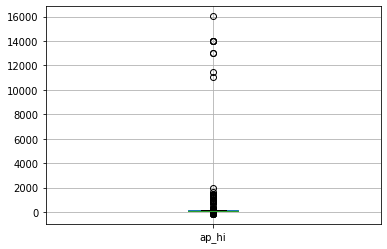

In [ ]:
data = pd.DataFrame(dataset.ap_hi)
data.boxplot()

print("---------------- Resumen Estadístico de la variable ----------------")
print(data.describe())

values = dataset.ap_hi
print("-----------------Ver outliers -----------------")
#Imprimir valores que se encuentren entre dichos cuartiles
print(values[values.between(values.quantile(0), values.quantile(.003))] )
print(values[values.between(values.quantile(.997), values.quantile(1))] )

#Remover Outliers
dataset = dataset.loc[values.between(values.quantile(0.001), values.quantile(.998)), :]
print("---------------- Resumen Estadístico de la variable después de quitar outliers----------------")
print(dataset.ap_hi.describe())

####ap_lo

El conjunto de datos indica que el ap_lo representa la presión sanguínea diastólica. Similar al atributo de ap_hi, se recomienda realizar un escalamiento de los datos y remover los outliers detectados, ya que representan valores irreales de este tipo de presión sanguínea con los que puede tener una persona. Se toma esta decisión para que el procesamiento del conjunto de datos sea acorde al modelo con el que se van a ejecutar los modelos de clasificación.

---------------- Resumen Estadístico de la variable ----------------
              ap_lo
count  69156.000000
mean      96.498655
std      188.756592
min      -70.000000
25%       80.000000
50%       80.000000
75%       90.000000
max    11000.000000
-----------------Ver outliers -----------------
28       60
59       60
138      60
189      60
198      60
         ..
69178    60
69223    60
69233    60
69238    60
69279    60
Name: ap_lo, Length: 2858, dtype: int64
182       1100
876       1200
880       1100
915       1100
1370      1100
         ...  
66775     1200
67338     1100
67589     1100
67839    10000
68853     1100
Name: ap_lo, Length: 219, dtype: int64
---------------- Resumen Estadístico de la variable después de quitar outliers----------------
count    69019.000000
mean        93.013721
std        104.011496
min         49.000000
25%         80.000000
50%         80.000000
75%         90.000000
max       1100.000000
Name: ap_lo, dtype: float64


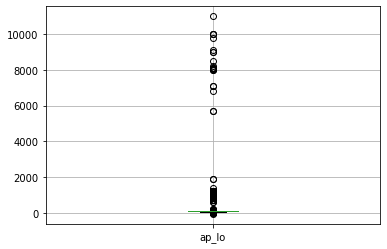

In [ ]:
data = pd.DataFrame(dataset.ap_lo)
data.boxplot()

print("---------------- Resumen Estadístico de la variable ----------------")
print(data.describe())

values = dataset.ap_lo
print("-----------------Ver outliers -----------------")
#Imprimir valores que se encuentren entre dichos cuartiles
print(values[values.between(values.quantile(0), values.quantile(.003))] )
print(values[values.between(values.quantile(.997), values.quantile(1))] )

#Remover Outliers
dataset = dataset.loc[values.between(values.quantile(0.001), values.quantile(.998)), :]
print("---------------- Resumen Estadístico de la variable después de quitar outliers----------------")
print(dataset.ap_lo.describe())

####Modelo de Train (60%), validation (20%) y test (20%)

In [ ]:
#Separar los datos en X y Y, donde Y es la variable que queremos predecir
my_data = dataset
X = my_data.iloc[:, :12]
cantidad_muestras = len(my_data)
y = my_data.iloc[:, 12]


print("\nMuestra fila 1: ",X[0:1])
print("\nCantidad de muestras: ", len(my_data))
print("\nCantidad de atributos (incluye y): ", my_data.shape[1])


Muestra fila 1:     id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   1  22469       1     155    69.0    130     80            2     2      0   

   alco  active  
0     0       1  

Cantidad de muestras:  69019

Cantidad de atributos (incluye y):  13


In [ ]:
#Se divide el conjunto de datos en Train, Validation y Test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    shuffle=True,     #Mezclar los datos y que se reparta aleatoriamente
                                                    random_state=40)  #Definir una semilla para usar los mismos valores en todas las corridas

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.25,
                                                    shuffle=True,     #Mezclar los datos y que se reparta aleatoriamente
                                                    random_state=40)  #Definir una semilla para usar los mismos valores en todas las corridas

print("\nTamaño de X_train + X_val  + X_test : ", len(X_train)+len(X_val)+len(X_test))
print("\nTamaño del train: ", len(X_train))
print("\nTamaño del test: ", len(X_test))
print("\nTamaño del validation: ", len(X_val))
print("\nPrimeros elementos del X_train:")
print( X_train[0:4])
print("\nPrimeros elementos del X_test:")
print( X_test[0:4])
print("\nPrimeros elementos del X_val:")
print( X_val[0:4])
print("\nPrimeros elementos del y_train:")
print( y_train[0:4])
print("\nPrimeros elementos del y_test:")
print( y_test[0:4])
print("\nPrimeros elementos del y_val:")
print( y_val[0:4])


Tamaño de X_train + X_val  + X_test :  69019

Tamaño del train:  41411

Tamaño del test:  13804

Tamaño del validation:  13804

Primeros elementos del X_train:
          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
17002  17003  20422       1     158    61.0    110     70            1     1   
63048  63049  18240       2     165    78.0    120     80            1     1   
32262  32263  21273       2     168    60.0    120     80            3     3   
11327  11328  16864       2     168    67.0    120     80            1     1   

       smoke  alco  active  
17002      0     0       1  
63048      0     0       1  
32262      1     1       1  
11327      0     0       1  

Primeros elementos del X_test:
          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
34093  34094  21678       1     159    79.0    160    100            1     1   
2741    2742  21918       1     149    49.0    150     90            1     1   
64290  64291  16552  

####Atributo id

Tal y como se indicó previamente, se optó por eliminar la variable de id ya que no proporciona información útil  al problema en que nos encontramos, caso contrario como sucedería con series temporales donde el tiempo en que fueron tomadas las muestras cobra una gran relevancia.

In [ ]:
X_train = X_train.drop('id', 1)
X_val = X_val.drop('id', 1)
X_test = X_test.drop('id', 1)
#Se muestra la cantidad de datos para el train, validation y el test
print(X_train.count())
print('--------------------')
print(X_val.count())
print('--------------------')
print(X_test.count())

# Se almacena en una variable los valores de las nuevas columnas del arreglo X
column_names = X_train.columns.values

age            41411
gender         41411
height         41411
weight         41411
ap_hi          41411
ap_lo          41411
cholesterol    41411
gluc           41411
smoke          41411
alco           41411
active         41411
dtype: int64
--------------------
age            13804
gender         13804
height         13804
weight         13804
ap_hi          13804
ap_lo          13804
cholesterol    13804
gluc           13804
smoke          13804
alco           13804
active         13804
dtype: int64
--------------------
age            13804
gender         13804
height         13804
weight         13804
ap_hi          13804
ap_lo          13804
cholesterol    13804
gluc           13804
smoke          13804
alco           13804
active         13804
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


####Escalamiento de los datos

In [ ]:
# Escalar datos
scaler = StandardScaler()
transformer = scaler.fit(X_train)
#Se deben escalar tanto train, val y test
X_train = transformer.transform( X_train)
X_val = transformer.transform( X_val)
X_test = transformer.transform( X_test)
print("Primeros X_train: ", X_train[0:1])
print("Primeros X_train: ", X_val[0:1])
print("Primeros X_test: ", X_test[0:1])

Primeros X_train:  [[ 0.38716986 -0.73688448 -0.78579262 -0.92227278 -0.94870499 -0.22156063
  -0.53914189 -0.39801146 -0.31225542 -0.23629946  0.49440175]]
Primeros X_train:  [[-1.03403666 -0.73688448  0.44222334 -0.64296392 -0.38018436 -0.12935355
  -0.53914189 -0.39801146 -0.31225542 -0.23629946  0.49440175]]
Primeros X_test:  [[ 0.89601689 -0.73688448 -0.66299102  0.33461709  1.89389817  0.05506062
  -0.53914189 -0.39801146 -0.31225542 -0.23629946  0.49440175]]


####Guardar el archivo después del pre-procesamiento

In [ ]:
from pathlib import Path

#JUNTAR XTRAIN,YTRAIN, XTEST,YTEST XVAL,YVAL
new_columns_names = np.append(column_names,'cardio')
print(new_columns_names)

X_concat = np.concatenate((X_train, X_val,X_test), axis=0)

Y_concat = np.concatenate((y_train,y_val,y_test), axis=0)
#Se convierte a matriz y luego se hace columna
Y_concat = np.asmatrix(Y_concat)
Y_concat = np.transpose(Y_concat)
#Se agrega la columna de Y 
data = np.concatenate((X_concat,Y_concat), axis=1)

#Guardar el dataset en un csv
X_df = pd.DataFrame(data = data, columns = new_columns_names)
X_df.to_csv("cardioPROCESADO.csv",index=False,sep= ";")

['age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol' 'gluc'
 'smoke' 'alco' 'active' 'cardio']


###Diseño experimental

####Métricas a utilizar

Para el siguiente diseño experimental se propone utilizar las siguientes métricas, sacando provecho de sus implementaciones en la biblioteca de sklearn.

*   Accuracy: En el caso de clasificaciones binarias, como es el contexto de este problema, sklearn ejecuta el accuracy de forma exacta como lo hace 
*   ROC_AUC:

#### Algoritmo #1 - Support Vector Machines (SVM)

SVMs constituye un conjunto de métodos para realizar aprendizaje supervisado, en escenarios de clasificación, regresión y detección de outliers. Dentro de los principales beneficios de utilizar esta familia de algoritmos, se pueden mencionar los siguientes:



*   Efectivos en espacios de muchas dimensiones
*   Eficiente en términos de manejo de memoria
*   Flexible a la hora de seleccionar los tipos función de kernel que se pueden incorporar en la función de toma de decisiones

De igual forma es necesario tener cuidado con el conjunto de datos que se vaya a predecir, ya que si el número de características de los datos es mucho mayor que el número de muestras obtenidas, la selección del tipo de kernel y la regularización utilizada se vuelven cruciales para obtener resultados adecuados.

SVM incluye las clases denomindas SVC, NuSVC y LinearSVC para efectuar clasificación tanto binaria como multiclases. Las dos primeras son muy similares pero utilizan formulaciones matemáticas distintas, y aceptan parámetros de configuración diferentes. Por su parte LinearSVC, representa otra implementación de SVC (Support Vector Classification) que utiliza por defecto un kernel de tipo lineal. Al igual que la mayoría de clasificadores, cualquiera de las clases mencionadas de SVC recibe como parámetro de entrada dos conjuntos, las muestras de training que corresponden con un arreglo de entrenamiento denominado **X**, de tamaño (numero_muestras, numero_caracteristicas), y un conjunto **Y** que representa las etiquetas de los tipos de clases que se van a predecir (con soporte para strings o valores enteros). El proceso de ajuste y modelado por medio de la función de decisión, se basa en el uso de vectores de soporte que el algoritmo obtiene dentro del mismo conjunto de entrenamiento. 



####Validación de hiperparámetros

En nuestro caso se optó por utilizar la clase de SVC. Dentro de los hiperparámetros de mayor importancia con que cuenta el modelo se encuentran:


*   C: Parámetro de regularización utilizado por sklearn. Aquí C es el parámetro de penalización, que representa clasificación errónea o término de error. El término de clasificación errónea o error le dice a la optimización de SVM cuánto error es soportable. Así es como puede controlar el equilibrio entre el límite de decisión y el término de clasificación errónea.

*   Gamma: Un valor más bajo de Gamma se ajustará libremente al conjunto de datos de entrenamiento, mientras que un valor más alto de gamma se ajustará exactamente al conjunto de datos de entrenamiento, lo que provoca un ajuste excesivo. En otras palabras, debe existir un balance en el parámetro seleccionado para que se ajuste de buena manera al conjunto de datos utilizado. Por defecto su valor es de 1 / (n_atributos * X.var()).

*   Kernel: La función principal del kernel es transformar los datos de entrada del conjunto de datos dados en la forma requerida. Hay varios tipos de funciones, como funciones de base lineales, polinómicas y radiales (RBF).





In [ ]:
# Se declaran arreglos y diccionarios donde se almacenan los resultados obtenidos
matrizPredicciones = []
diccMetricas = {}

In [ ]:
import math
# Función auxiliar que permite obtener la mejor métrica a partir de un arreglo ingresado a la entrada
def getBestMetric(resultados):
    mejor = math.inf
    elMejor = 0.0
    for e in resultados:
        if resultados[e] < mejor:
            mejor = resultados[e]
            elMejor = e
    return mejor, elMejor

####Cross validation

A continuación se realiza un cross validation con 5 Folds. La idea es utilizar el conjunto de datos de validación para encontrar los hiperparámetros que mejor optimicen el modelo, a la hora de ejecutar el algoritmo con los conjuntos de entrenamiento y testing. Para el caso del SVC se validan los parámetros de gamma y C. En el caso del kernel se utiliza por defecto el linear, ya que al hacer pruebas con otro tipo de kernels los tiempos requeridos de ejecución eran computacionalmente grandes, lo cual dificultaba el desarrollo de un diseño experimental con un cross validation donde se validen múltiples parámetros de kernel ingresados.

In [ ]:
from numpy.random.mtrand import shuffle
from sklearn.model_selection import KFold
from sklearn import metrics

numFolds = 5
gammas = [1,0.1,0.01, 0.001, 0.0001] #Valores de gamma que se van a validar
c_values = [0.1,1,5,8,10] # Valores de C que se van a validar
resultados_gammas1 = {}
resultados_gammas2 = {}
resultados_c1 = {}
resultados_c2 = {}

for i in range(numFolds):
    kf = KFold(n_splits=numFolds,
              shuffle=True,
              random_state=10)

    resultados_metric1_gamma = []
    resultados_metric2_gamma = []
    resultados_metric1_c = []
    resultados_metric2_c = []
    kf.get_n_splits(X_val)
    keysY = y_val.keys()

    for train_index, val_index in kf.split(X_val): 

        X_train_tmp = X_val[train_index]
        X_val_tmp = X_val[val_index]
        y_train_tmp = y_val[keysY[train_index]]
        y_val_tmp = y_val[keysY[val_index]]   

        #Se ejecuta el modelo con cada uno de los gammas, utilizando el conjunto de validación
        # Se guardan resultados para ambas métricas, tanto Accuracy, como ROC_AUC
        clf = svm.SVC(kernel='linear', gamma=gammas[i])
        clf.fit(X_train_tmp, y_train_tmp)
        y_pred = clf.predict(X_val_tmp)
        metric1 = metrics.accuracy_score(y_val_tmp, y_pred)    
        resultados_metric1_gamma.append( metric1)
        metric2 = metrics.roc_auc_score(y_val_tmp, y_pred)    
        resultados_metric2_gamma.append( metric2)

        #Se ejecuta el modelo con cada uno de los valores de C, utilizando el conjunto de validación
        # Se guardan resultados para ambas métricas, tanto Accuracy, como ROC_AUC
        clf = svm.SVC(kernel='linear', C=c_values[i])
        clf.fit(X_train_tmp, y_train_tmp)
        y_pred = clf.predict(X_val_tmp)
        metric1 = metrics.accuracy_score(y_val_tmp, y_pred)    
        resultados_metric1_c.append( metric1)
        metric2 = metrics.roc_auc_score(y_val_tmp, y_pred)    
        resultados_metric2_c.append( metric2)

    promedio_metric1_gamma = sum(resultados_metric1_gamma) / len(resultados_metric1_gamma)
    promedio_metric2_gamma = sum(resultados_metric2_gamma) / len(resultados_metric2_gamma)
    promedio_metric1_c = sum(resultados_metric1_c) / len(resultados_metric1_c)
    promedio_metric2_c = sum(resultados_metric2_c) / len(resultados_metric2_c)
    print("\nMétricas obtenidas en cross-validation para gamma de: ", gammas[i], " Accuracy: ", resultados_metric1_gamma, 
              "     con un promedio de: ", promedio_metric1_gamma)
    print("\nMétricas obtenidas en cross-validation para gamma de: ", gammas[i], " ROC_AUC: ", resultados_metric2_gamma, 
              "     con un promedio de: ", promedio_metric2_gamma)
    


    resultados_gammas1[gammas[i]] = promedio_metric1_gamma
    resultados_gammas2[gammas[i]] = promedio_metric2_gamma

    print("\nMétricas obtenidas en cross-validation para C de: ", c_values[i], " Accuracy: ", resultados_metric1_c, 
              "     con un promedio de: ", promedio_metric1_c)
    print("\nMétricas obtenidas en cross-validation para C de: ", c_values[i], " ROC_AUC: ", resultados_metric2_c, 
              "     con un promedio de: ", promedio_metric2_c)
    
    resultados_c1[c_values[i]] = promedio_metric1_c
    resultados_c2[c_values[i]] = promedio_metric2_c

print('-----------------------------------------------------------------------')
print("\nResultados del Train-Validation: ")
mejor_metrica, mejor_gamma = getBestMetric(resultados_gammas1)
print("\nMejor valor de accuracy en Train-Validation: ", mejor_metrica,", Gamma: ", mejor_gamma)
mejor_metrica, mejor_gamma = getBestMetric(resultados_gammas2)
print("\nMejor valor de ROC_AUC en Train-Validation: ", mejor_metrica,", Gamma: ", mejor_gamma)  


mejor_metrica, mejor_c = getBestMetric(resultados_c1)
print("\nMejor valor de accuracy en Train-Validation: ", mejor_metrica,", C: ", mejor_c)
mejor_metrica, mejor_c = getBestMetric(resultados_c2)
print("\nMejor valor de ROC_AUC en Train-Validation: ", mejor_metrica,", C: ", mejor_c)


Métricas obtenidas en cross-validation para gamma de:  1  Accuracy:  [0.7164070988772184, 0.7171314741035857, 0.723650851140891, 0.7250996015936255, 0.7202898550724638]      con un promedio de:  0.7205157761575569

Métricas obtenidas en cross-validation para gamma de:  1  ROC_AUC:  [0.7145731581842845, 0.7199271802577587, 0.7217145707011051, 0.7247503607503607, 0.7217902470487143]      con un promedio de:  0.7205511033884446

Métricas obtenidas en cross-validation para C de:  0.1  Accuracy:  [0.7160449112640348, 0.7174936617167693, 0.7232886635277074, 0.7247374139804419, 0.7206521739130435]      con un promedio de:  0.7204433648803994

Métricas obtenidas en cross-validation para C de:  0.1  ROC_AUC:  [0.71421829658031, 0.7202768306074091, 0.7213602120901909, 0.7243896103896104, 0.7221468804295988]      con un promedio de:  0.7204783660194238

Métricas obtenidas en cross-validation para gamma de:  0.1  Accuracy:  [0.7164070988772184, 0.7171314741035857, 0.723650851140891, 0.72509960159

In [ ]:
#Entrenar y predecir con los mejores parámetros
clf = svm.SVC(kernel='linear', C=mejor_c, gamma=mejor_gamma)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Se agrega a la matriz de predicciones
matrizPredicciones.append(y_pred)
#Mostrar las métricas y Agregar al diccionario de métricas
Accuracy = metrics.accuracy_score(y_test, y_pred)
ROC_AUC = metrics.roc_auc_score(y_test, y_pred)
print('Accuracy', Accuracy)
print('ROC_AUC', ROC_AUC)
diccMetricas['SVC'] = [Accuracy,ROC_AUC]

Accuracy 0.7208055636047522
ROC_AUC 0.7206301400781504


#### Algoritmo #2 - Ensemble Bagging Classifier

Un clasificador de Bagging es un meta-estimador de conjunto que ajusta los clasificadores base a subconjuntos aleatorios del conjunto de datos original y luego agrega sus predicciones individuales (ya sea mediante votación o promediando) para formar una predicción final. Un meta-estimador de este tipo se puede utilizar típicamente como una forma de reducir la varianza de un estimador de caja negra, introduciendo la aleatoriedad en su procedimiento de construcción y luego convirtiéndolo en un conjunto.



####Validación de hiperparámetros 

*  Base_estimator: Corresponde con el estimador base para ajustarse a subconjuntos aleatorios del conjunto de datos. Si no se ingresa ningún parámetro, entonces el estimador base por defecto es DecisionTreeClassifier. El cual es el caso de este diseño experimental.

*  Num_estimators:  El número de estimadores base que se utilizaran el en "ensemble" o conjunto que trabaja el algoritmo. Por lo general, la cantidad de árboles aumenta hasta que el rendimiento del modelo se estabiliza. La intuición podría sugerir que más árboles conducirán a un sobreajuste, aunque este no es el caso. El ensemble y el conjunto relacionado de algoritmos de árboles de decisión  parecen ser algo inmunes al sobreajuste del conjunto de datos de entrenamiento dada la naturaleza estocástica del algoritmo de aprendizaje.

In [ ]:
from sklearn.ensemble import BaggingClassifier

numFolds = 5
estimators = [2,4,6,8,10] # Número de estimators que se van a validar
resultados_estim1 = {}
resultados_estim2 = {}


for i in range(numFolds):
    kf = KFold(n_splits=numFolds,
              shuffle=True,
              random_state=10)

    resultados_metric1_estim = []
    resultados_metric2_estim = []
    kf.get_n_splits(X_val)
    keysY = y_val.keys()

    for train_index, val_index in kf.split(X_val): 

        X_train_tmp = X_val[train_index]
        X_val_tmp = X_val[val_index]
        y_train_tmp = y_val[keysY[train_index]]
        y_val_tmp = y_val[keysY[val_index]]   

        #Se ejecuta el modelo con cada uno de los valores posibles de estimators, utilizando el conjunto de validación
        # Se guardan resultados para ambas métricas, tanto Accuracy, como ROC_AUC
        clf = BaggingClassifier(n_estimators=estimators[i], random_state=0)
        clf.fit(X_train_tmp, y_train_tmp)
        y_pred = clf.predict(X_val_tmp)
        metric1 = metrics.accuracy_score(y_val_tmp, y_pred)    
        resultados_metric1_estim.append( metric1)
        metric2 = metrics.roc_auc_score(y_val_tmp, y_pred)    
        resultados_metric2_estim.append( metric2)


    promedio_metric1_estim = sum(resultados_metric1_estim) / len(resultados_metric1_estim)
    promedio_metric2_estim = sum(resultados_metric2_estim) / len(resultados_metric2_estim)

    print("\nMétricas obtenidas en cross-validation para Num estimators de: ", estimators[i], " Accuracy: ", resultados_metric1_estim, 
              "     con un promedio de: ", promedio_metric1_estim)
    print("\nMétricas obtenidas en cross-validation para Num estimators de: ", estimators[i], " ROC_AUC: ", resultados_metric2_estim, 
              "     con un promedio de: ", promedio_metric2_estim)
    


    resultados_estim1[estimators[i]] = promedio_metric1_estim
    resultados_estim2[estimators[i]] = promedio_metric2_estim

print('-----------------------------------------------------------------------')
print("\nResultados del Train-Validation: ")
mejor_metrica, mejor_estim = getBestMetric(resultados_estim1)
print("\nMejor valor de accuracy en Train-Validation: ", mejor_metrica,", Estimators: ", mejor_estim)
mejor_metrica, mejor_estim = getBestMetric(resultados_estim2)
print("\nMejor valor de ROC_AUC en Train-Validation: ", mejor_metrica,", Estimators: ", mejor_estim)  



Métricas obtenidas en cross-validation para Num estimators de:  2  Accuracy:  [0.6378123868163709, 0.6287576964867801, 0.6356392611372691, 0.6157189424121695, 0.631159420289855]      con un promedio de:  0.629817541428489

Métricas obtenidas en cross-validation para Num estimators de:  2  ROC_AUC:  [0.634605935637764, 0.6351326359590822, 0.6321628999658767, 0.614995670995671, 0.6338735532449961]      con un promedio de:  0.630154139160678

Métricas obtenidas en cross-validation para Num estimators de:  4  Accuracy:  [0.6606302064469395, 0.6675117710974284, 0.6693227091633466, 0.6537486417964505, 0.6608695652173913]      con un promedio de:  0.6624165787443113

Métricas obtenidas en cross-validation para Num estimators de:  4  ROC_AUC:  [0.6585779918612805, 0.6712188637808473, 0.6674879911804078, 0.6533160173160173, 0.6624241825794835]      con un promedio de:  0.6626050093436073

Métricas obtenidas en cross-validation para Num estimators de:  6  Accuracy:  [0.6657008330315103, 0.67620

In [ ]:
#Entrenar y predecir con los mejores parámetros de los estimators
clf = BaggingClassifier(n_estimators=mejor_estim, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Se agrega a la matriz de predicciones
matrizPredicciones.append(y_pred)
#Mostrar las métricas y Agregar al diccionario de métricas
Accuracy = metrics.accuracy_score(y_test, y_pred)
ROC_AUC = metrics.roc_auc_score(y_test, y_pred)
print('Accuracy', Accuracy)
print('ROC_AUC', ROC_AUC)
diccMetricas['BAGGING'] = [Accuracy,ROC_AUC]

Accuracy 0.6385830194146624
ROC_AUC 0.6382528201366455


###Resultados y Conclusiones

####Análisis de las métricas obtenidas

In [ ]:
for key in diccMetricas:
  print(key)
  print('Accuracy: ', diccMetricas[key][0])
  print('ROC_AUC  : ', diccMetricas[key][1])
  print('\n')

SVC
Accuracy:  0.7208055636047522
ROC_AUC  :  0.7206301400781504


BAGGING
Accuracy:  0.6385830194146624
ROC_AUC  :  0.6382528201366455




####Conclusiones

___

# Parte 2  -  Clustering  (50 puntos)
___

### Considere lo siguiente:
1. Conjunto de datos: **descubrir_emociones.csv**
1. Este dataset corresponde a pixeles en imágenes, a partir de las cuales se desea descubrir cuántos grupos (clusters) se podrían encontrar. Se cree que son diferentes emociones de las personas en las imágenes (alegría, enojo, tristeza, etc).
1. Proponga al menos dos algoritmos a utilizar
1. Proponga una métrica, la cual debe ser **interna**.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso. Observará que en este caso viene bastante preparado
    1. Para cada uno de los algoritmos seleccionados: 
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros.
    1. Explicación del diseño experimental por ejecutar. En este caso recuerde que es aprendizaje NO Supervisado. Además en cuanto al número de clusters, se cree que es mayor que uno y menor que veinte. 
    1. Programación del diseño experimental. 
    1. Muestre en una tabla los resultados de la métrica.
    1. Grafique las métrica para ver el criterio del codo.
    1. ¿Cuál es el númermo de cluster que considera mejor describe el conjunto de datos? ¿Cómo defendería su recomendación ante su contratante? (Considere en su respuesta los algoritmos que utilizó)

##2.1. Preprocesamiento de los datos
En esta sección como un paso inicial, se carga se el dataset y se muestra algunas de las imagenes contenidas en este. 
Como parte del procesamiento, normalmente buscaríamos valores faltantes, outliers, y variables que haya que codificar. Pero para este dataset no es mecesario, pues se trata de pixeles, y todos están completos ya que todas las imágenes tienen la misma dimensión, además todas las variables, sabemos de ante mano que están en un valor de 0 a 255, por lo que no habrán outliers a menos que se haya hecho mal el dataset. 

Tampoco tenemos que codificar variables pues todas hacen referencia a pixeles. Esto también nos lleva a que no se pueden reducir atributos, al menos no para el problema que queremos resolver con este conjunto, porque nos interesa tener las imagenes completas. 

De igual forma, no consideramos necesario escalar los datos, porque todos se encuentran entre 0 y 255, son valores que tenemos por seguro que serán así. Si se desea se puede escalar, pero consideramos que no es indispensable en este caso, además de hizo la prueba en otro notebook para comprobar y al graficar el método del codo, la diferencia es mínima, pues si se escalan los datos solo se ve la curva más lisa. 

--------------------------------------------------

In [ ]:
%matplotlib inline
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
emotions_df = pd.read_csv('/content/drive/MyDrive/1 SEMESTRE 2022/IA/Trabajo Práctico 3/descubrir_emociones.csv', header = 0, delimiter=';')  
#print(dataset.describe())
print(emotions_df.head(2))
#Ver las filas
#A veces no me cargan todas
print(emotions_df.shape[0])

    p1   p2   p3   p4   p5   p6   p7   p8   p9  p10  ...  p2295  p2296  p2297  \
0   70   80   82   72   58   58   60   63   54   58  ...    159    182    183   
1  151  150  147  155  148  133  111  140  170  174  ...    105    108     95   

   p2298  p2299  p2300  p2301  p2302  p2303  p2304  
0    136    106    116     95    106    109     82  
1    108    102     67    171    193    183    184  

[2 rows x 2304 columns]
24568


Se crea una función para reconstruir imagenes, en este caso solo se muestra una, pues el objetivo es ver los datos con los que estamos trabajando. 

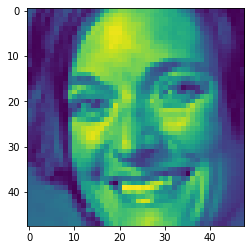

In [ ]:
def displayImg(i):
  plt.imshow(emotions_df.loc[i].values.reshape(48,48))
#Mostrar la imagen en la fila 2457
displayImg(2457)

--------------------------------------------------

##2.2 Algoritmos de clustering

En esta sección vamos a presentar el desarrollo y explicación de los algoritmos de Mini-batch K-means clustering y Birch clustering. 

Se han elegido estos dos porque en general, usar ambos algoritmos derivados de k-means como Mini-batch t Bisecting K-means, no nos permitía aprender mucho más, así que se usó Mini-batch por rapidez. 

Tampoco pudimos usar los algoritmos de Spectral clustering, pues aunque estos tienen el hiperparámetro que nos interesa, que es el número de clusters, y además son interesantemente buenos con imágenes, pero no se pudo terminar de ejecutar pues después de incluso 10 horas no estaba listo. 

En el caso de los agglomerative clustering, no se pudo pues no cuentan con hiperparámetros a probar en el análisis experimental. 

Finalmente se intentó con otro método, que a pesar de no tener el número de clusters, nos podría dar una estimación del mismo, sin embargo es algo lerdo, por lo que solo se logró ejecutarlo con un tercio de los datos para que durara unas cuantas horas, no obstante no es parte de la presente tarea.

Por dichas razones se usan los algoritmos de Mini-Batch y Birch. 


###2.2.2 Mini-batch K-means Clustering

Este algoritmo es una variante del K means visto en clases, solo que utiliza lotes, para reducir el tiempo de cálculo e intenta optimizar la función de objetivo al mismo tiempo.
Los mini lotes son muestreados en cada iteración, la desventaja es que muestra peores resultados que el K means, pero con la ventaja de ser más rápido. 
Otro aspecto de este algortimo es que por cada lote, el centroide asignado, se actualiza, con el promedio de todas las muestras anteriores a ese centroide y a la larga, esto disminuye la tasa de cambio del mismo.

Para este ejemplo usamos este algoritmo por su rápidez, ya que otros aunque quizá más exactos, tardan incluso horas, y muchos otros no tenían el hiperparámetro de número de clúster que es requerido en esta tarea. 

* Con respecto a los hiperparámetros, tenemos el número de clusters, vamos a guardar las métricas cambiando este valor de 2 a 19 clústers. 
* El método de inicialización, es decir el init, se escogió como K-means++, porque este selecciona los centroides iniciales para el agrupamiento, y lo hace de manera más inteligente. 
* Max_iter es el número de iteraciones que se hacen sobre el conjunto, el default es 100, pero se dejó 300 para ver si logra mejores resultados.
* N_init, número de veces que se ejecutará el algoritmo con semillas de centroide diferente. 
* Random_state es para la inicialización de los centroides, de manera random. El valor elegido es la semilla.
* Por último el batch_size es el tamaño de los mini lotes, en este caso es de 1024 porque es el valor preterminado y porque parece un valor adecuado para asegurar que sea un poco más rápido.



In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import calinski_harabasz_score

#Sum of squares based indexes
SSBI_Batches = []
wcss= []
#De 2 a 19
for i in range(2,20): 
    miniB_KMeans = MiniBatchKMeans(n_clusters=i, init="k-means++",max_iter=300, n_init=20, random_state=0, batch_size=1024) #max_iter por default es 300
    miniB_KMeans.fit(emotions_df)
    c_score = calinski_harabasz_score(emotions_df, miniB_KMeans.labels_)
    wcss.append(miniB_KMeans.inertia_)
    SSBI_Batches.append(c_score)


#### Método del codo usando WCSS 
Suma de los cuadrados de las distancias (Within cluster sum of squares), en este caso el algoritmo trae dicha métrica con el atributo inertia_.  


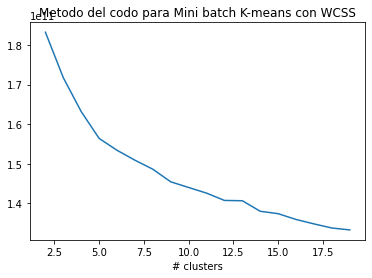

In [ ]:
plt.plot(range(2,20),wcss) 
plt.title("Metodo del codo para Mini batch K-means con WCSS")
plt.xlabel("# clusters")
plt.show() 

#### Método del codo usando SSBI 
Otra métrica que decidimos usar es un indice basado en la suma de cuadrados (Sum of squares based indexes), en este caso más especificamente calinski_harabasz_score que se encuentra en sklearn. 
Se escogió esta métrica ya que no tenemos los valores reales de las etiquetas, y porque es un buen criterio para la relación de la varianza, en la que una puntuación más alta significa que el modelo tiene clusters mejor definidos. El indice es la relación de la suma de la disperción entre los clusters.  

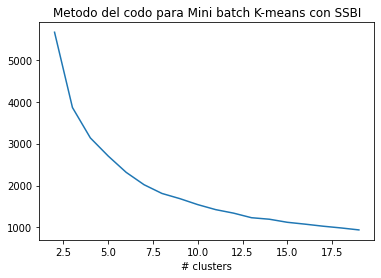

In [ ]:
plt.plot(range(2,20),SSBI_Batches) 
plt.title("Metodo del codo para Mini batch K-means con SSBI")
plt.xlabel("# clusters")
plt.show() 

#### Guardado de métricas para método del codo en Mini-batch K-means Clustering
Se guardan los valores de las métricas usadas, en este caso inertia_, que es una métrica que incluye el modelo y calinski harabasz, ambas para ilustrar la gráfica del codo.

In [ ]:
from joblib import dump
dump(SSBI_Batches, 'SSBI_Batches_Kmeans.joblib') 
dump(wcss, 'wcss_Batches_Kmeans.joblib') 

['wcss_Batches_Kmeans.joblib']

#### Recuperación de métricas para método del codo en Mini-batch K-means Clustering
Los archivos que contienen la información de métricas se encuentran en drive. De manera que solo tenemos que cargarlas aquí para no correr el algoritmo desde cero, ya que en particular algunos aunque no Mini batch, suelen ser muy tardados. 

In [ ]:
from joblib import load
SSBI_Batches = load('/content/drive/MyDrive/1 SEMESTRE 2022/IA/Trabajo Práctico 3/SSBI_Batches_Kmeans.joblib') 
wcss = load('/content/drive/MyDrive/1 SEMESTRE 2022/IA/Trabajo Práctico 3/wcss_Batches_Kmeans.joblib') 

#### Resultados de las métricas WCSS Y SSBI para Mini-Batch

In [ ]:
for i in range(len(wcss)):
  print("Número de clústers:", i+2, " métrica WCSS:", wcss[i], " métrica SSBI:", SSBI_Batches[i])

Número de clústers: 2  métrica WCSS: 183202451031.01837  métrica SSBI: 5657.253690167098
Número de clústers: 3  métrica WCSS: 171723611834.94717  métrica SSBI: 3861.6757363918655
Número de clústers: 4  métrica WCSS: 163172067683.95502  métrica SSBI: 3136.6503315769355
Número de clústers: 5  métrica WCSS: 156403111077.88257  métrica SSBI: 2703.3651208526217
Número de clústers: 6  métrica WCSS: 153411595583.83008  métrica SSBI: 2315.612658029577
Número de clústers: 7  métrica WCSS: 150902526611.58148  métrica SSBI: 2020.1022753477064
Número de clústers: 8  métrica WCSS: 148629808927.5461  métrica SSBI: 1811.7498527075645
Número de clústers: 9  métrica WCSS: 145450152297.74292  métrica SSBI: 1688.0514423543357
Número de clústers: 10  métrica WCSS: 144017435348.67828  métrica SSBI: 1545.3415604830068
Número de clústers: 11  métrica WCSS: 142598798158.50568  métrica SSBI: 1425.9942860719889
Número de clústers: 12  métrica WCSS: 140751203615.245  métrica SSBI: 1342.318063114689
Número de clú

--------------------------------------------------

###2.2.1 Birch clustering

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) es un algoritmo de agrupamiento que puede agrupar grandes conjuntos de datos generando primero un resumen pequeño y compacto del gran conjunto de datos que conserva la mayor cantidad de información posible. Este resumen más pequeño luego se agrupa en clústeres en lugar de agrupar el conjunto de datos más grande.

Este algoritmo usa eficientemente la memoria, y es una alternativa al algoritmo anterior. 
Pero en el caso de birch, contruye una estructura de datos de árbol con centroides del clúster que se leen de la hoja.


* El número de clústers es importante porque es el hiperparámetro que necesitamos para graficar el método del codo.
* Compute_labels, por default es true, es para calcular las etiquetas en cada ajuste. 
* El branching factor, por defecto es 50, y limita el número de subclusters en un nodo. Este valor se dejó así, porque cambiarlo habría que analizar los resultados con otros valores. 
* Y el threshold o umbral, limita la distancia entre la muestra entrante y los subclusters existentes. Este valor si se escoge muy bajo promueve la división, y viceversa si se escoge alto, por eso se eligió un punto medio. 


In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import calinski_harabasz_score
#Sum of squares based indexes
SSBI = []

#De 2 a 19
for i in range(2,20): 
  birch = Birch(n_clusters=i, compute_labels = True, branching_factor = 50, threshold = 0.5) 
  birch.fit(emotions_df)
  c_score = calinski_harabasz_score(emotions_df, birch.labels_)
  SSBI.append(c_score)


#### Método del codo usando SSBI 
Como ya se había explicado en la sección anterior, elegimos esta métrica de calinski_harabasz_score porque se encuentra en sklearn y nos sirve para cuando no tenemos los valores reales de las etiquetas. 

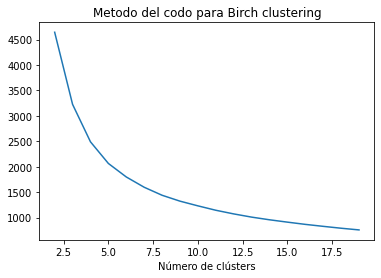

In [ ]:
plt.plot(range(2,20),SSBI) 
plt.title("Metodo del codo para Birch clustering")
plt.xlabel("Número de clústers")
plt.show() 

#### Guardado de métricas para método del codo en Birch clustering
Se guardan los valores de las métricas usadas, en este caso calinski Harabasz, que es una métrica elegida pues este modelo no cuenta con una definida, como en el caso de Mini-batch k-means.

In [ ]:
from joblib import dump, load
dump(SSBI, 'SSBI_Birch.joblib') 


['SSBI_Birch.joblib']

#### Recuperación de métricas para método del codo en Birch clustering
Los archivos que contienen la información de métricas se encuentran en drive. De manera que solo tenemos que cargarlas aquí para no correr el algoritmo desde cero para obtenerlas, ya que en particular algunos algoritmos suelen ser muy tardados, como fue el caso de este con aproximadamente 5 horas. 

In [ ]:
from joblib import load
SSBI = load('/content/drive/MyDrive/1 SEMESTRE 2022/IA/Trabajo Práctico 3/SSBI_Birch.joblib') 


#### Resultados de la métrica SSBI para Birch

In [ ]:
for i in range(len(SSBI)):
  print("Número de clústers:", i+2, " métrica SSBI:", SSBI[i])

Número de clústers: 2  métrica SSBI: 4645.300767972804
Número de clústers: 3  métrica SSBI: 3227.4087552663927
Número de clústers: 4  métrica SSBI: 2490.804700605051
Número de clústers: 5  métrica SSBI: 2065.2963364180423
Número de clústers: 6  métrica SSBI: 1799.837396664531
Número de clústers: 7  métrica SSBI: 1597.5154628394953
Número de clústers: 8  métrica SSBI: 1440.1079574853766
Número de clústers: 9  métrica SSBI: 1324.1741926471777
Número de clústers: 10  métrica SSBI: 1231.9092697676144
Número de clústers: 11  métrica SSBI: 1145.3670134345566
Número de clústers: 12  métrica SSBI: 1073.5304128733544
Número de clústers: 13  métrica SSBI: 1010.3417682438119
Número de clústers: 14  métrica SSBI: 957.7757832338375
Número de clústers: 15  métrica SSBI: 911.6180090196063
Número de clústers: 16  métrica SSBI: 867.6880629137272
Número de clústers: 17  métrica SSBI: 828.93829592115
Número de clústers: 18  métrica SSBI: 791.8783945033416
Número de clústers: 19  métrica SSBI: 758.7564934

--------------------------------------------------

##2.3 Diseño experimental 

En esta sección el objetivo es escoger uno de los hiperparámetros de los algoritmos y hacer un diseño experimental que implique probar diferentes valores para este y analizar los valores que da determinada métrica, haciendo cambios en el hiperparámetro. 

A continuación se muestran dos funciones que usan ambos diseños experimentales, una para ver el mejor hiperparámetro. Y otra para imprimir todas las métricas. 

Para ambos modelos, usamos silhouette score, métrica que también es interna y encontramos en sklearn. También es una métrica que podemos usar cuando no tenemos los labels reales. Se calcula usando la distancia media dentro del grupo y la distancia media del grupo más cercano para cada muestra. 

Es decir, es la distancia entre una muestra y el grupo más cercano del que la muestra no forma parte. El mejor valor es 1 y el peor es -1 indicando que se ha asignado incorrectamente algunos clústers. Valores cercanos a 0 indican clústeres superpuestos. 

In [ ]:
#Funcion que devuelve el mejor hiperparametro, según las métricas obtenidas
def getBetter(hyperameter,metrics):
  index = 0
  high = 0
  for m in range(len(metrics)):
    if metrics[m]>high:
      high = metrics[m]
      index = m
  return hyperameter[index]


In [ ]:
def imprimirMetricas(hyperameter,metrics):
  for h in range(len(hyperameter)):
    print("Para el hiperparámetro",hyperameter[h], "la métrica interna de silhouette coefficient es",metrics[h] )

--------------------------------------------------

###2.3.1 Diseño experimental para Mini-batch K-means Clustering
Dado que el algoritmo de Mini-Batch tiene un hiperparámetro importante como el tamaño del lote, el cual es determinante para la precisión y rapidez del algoritmo; queremos conocer los resultados de las métricas para tomar la desición de cuál podría ser tamaño más apropiado a nuestro conjunto de datos. 

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

Silluete_batches = []
sizeBatches = [256,512,768,1024,1280,1536,1792,2048]
#Probar el métricas para diferentes tamaños de lotes
for batch in sizeBatches: 
    kmeans = MiniBatchKMeans(n_clusters=7, init="k-means++",max_iter=300, n_init=20, random_state=0, batch_size=batch) #max_iter por default es 300
    kmeans.fit(emotions_df)
    s_score = silhouette_score(emotions_df, kmeans.labels_, metric='euclidean')
    Silluete_batches.append(s_score)


In [ ]:
#Guardamos los resultados 
from joblib import dump
dump(Silluete_batches, 'Silluete_batches.joblib') 

['Silluete_batches.joblib']

In [ ]:
#Se cargan los resultados, una vez descargados y subidos al drive
from joblib import load
Silluete_batches = load('/content/drive/MyDrive/1 SEMESTRE 2022/IA/Trabajo Práctico 3/Silluete_batches.joblib') 

In [ ]:
imprimirMetricas([256,512,768,1024,1280,1536,1792,2048],Silluete_batches)

Para el hiperparámetro 256 la métrica interna de silhouette coefficient es 0.07015199442130919
Para el hiperparámetro 512 la métrica interna de silhouette coefficient es 0.0662442004398201
Para el hiperparámetro 768 la métrica interna de silhouette coefficient es 0.06757160309473198
Para el hiperparámetro 1024 la métrica interna de silhouette coefficient es 0.07020957230207354
Para el hiperparámetro 1280 la métrica interna de silhouette coefficient es 0.07094075620135525
Para el hiperparámetro 1536 la métrica interna de silhouette coefficient es 0.07157794364682703
Para el hiperparámetro 1792 la métrica interna de silhouette coefficient es 0.06766124018319462
Para el hiperparámetro 2048 la métrica interna de silhouette coefficient es 0.07291261104961583


In [ ]:
print("El mejor hiperparámetro para batch_size es:", getBetter([256,512,768,1024,1280,1536,1792,2048],Silluete_batches))

El mejor hiperparámetro para batch_size es: 2048


--------------------------------------------------

###2.3.2 Diseño experimental para Birch clustering

Este algoritmo tiene algunos parametros con los que podemos podemos probar varios valores. Uno de ellos es el umbral, el otro es el factor de ramificación.

En este caso probamos con el umbral. Ya que como mencionamos anteriormente, limita la distancia entre la muestra entrante y los subclusters existentes. Sin embargo como en muchas pruebas, esta no salió como esperabamos, ya que por alguna razón, que quizá matemáticamente no podamos entender, modificar ese valor en nuestro modelo no generó ningún cambios.

 Al final se elige como umbral el valor 0.5 para estar en un punto medio.

In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
from google.colab import files
from joblib import dump


Silluete_birch = []
threshold_values = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for td in threshold_values: 
  birch = Birch(n_clusters=7, compute_labels = True, branching_factor = 50, threshold = td) 
  birch.fit(emotions_df)
  s_score = silhouette_score(emotions_df, birch.labels_, metric='euclidean')
  Silluete_birch.append(s_score)


dump(Silluete_birch, 'Silluete_birch.joblib') 
files.download("Silluete_birch.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from joblib import load
Silluete_birch = load('Silluete_birch.joblib') 

In [ ]:
#Se cargan los resultados, una vez descargados y subidos al drive
from joblib import load
Silluete_birch = load('/content/drive/MyDrive/1 SEMESTRE 2022/IA/Trabajo Práctico 3/Silluete_birch.joblib') 

In [ ]:
imprimirMetricas([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],Silluete_birch)

Para el hiperparámetro 0.2 la métrica interna de silhouette coefficient es 0.021349100510711018
Para el hiperparámetro 0.3 la métrica interna de silhouette coefficient es 0.021349100510711018
Para el hiperparámetro 0.4 la métrica interna de silhouette coefficient es 0.021349100510711018
Para el hiperparámetro 0.5 la métrica interna de silhouette coefficient es 0.021349100510711018
Para el hiperparámetro 0.6 la métrica interna de silhouette coefficient es 0.021349100510711018
Para el hiperparámetro 0.7 la métrica interna de silhouette coefficient es 0.021349100510711018
Para el hiperparámetro 0.8 la métrica interna de silhouette coefficient es 0.021349100510711018
Para el hiperparámetro 0.9 la métrica interna de silhouette coefficient es 0.021349100510711018


--------------------------------------------------

##2.4 Conclusión

Teniendo en cuenta no solo las gráficas de los codos para ambos algoritmos si no también evaluando los valores de las métricas, podríamos pensar que el número de clústers puede estar entre 7 y 10, porque después de esos valores lo que baja la métrica es realmente es poco, comparado con las diferencias entre los primeros que es de mil o más, las diferencias entre 7 y 10 son de 50 aproximadamente y de 10 en más las diferencias son más cortas. 

Puede ser confuso, porque en otros datasets suele aparecer un punto que resalta mucho el codo, pero en este caso se forma una curva más lisa. 

También se hicieron pruebas con Mean shift, pero lastimosamente no se incluyeron porque no se realizó con todo el dataset, sino con un 30% de los datos, pues con todo el conjunto no se pudo. En esa prueba, dio 4 clústers. 

Esto nos llevó a la conclusión de que quizá con todo el dataset podría no haber un número tan alto de clústers como 10, por ello pensamos que deben haber exactamente 7 clústers, pues de todos modos es lo que gráfica y las métricas nos muestran. 


--------------------------------------------------

##2.5 Opcionalmente se muestran gráficas de los clústers
Nos pareció importante mostrar graficamente, como queda la divisón de los clústers después de haber elegido un número de clústers al analizar las gráficas de codo. Esto no se pedía como parte de la tarea, pero nos ayudó a visualizar el trabajo del proceso realizado.

### Mini-batch K-means clustering

In [ ]:
from sklearn.cluster import MiniBatchKMeans
#Se cambia el tamaño del lote, por los resultados del diseño experimental 
miniB_KMeans = MiniBatchKMeans(n_clusters=7, init="k-means++",max_iter=300, n_init=7, random_state=0, batch_size=2048)
miniB_KMeans.fit(emotions_df)

result_batch = miniB_KMeans.predict(emotions_df)

In [ ]:
from sklearn.decomposition import PCA
'''
Se hace analisis de componentes principales, para reducir la dimensionalidad
De esta forma podemos hacer gráficas en 2D
'''
pca = PCA(n_components=2)
pca_emotions = pca.fit_transform(emotions_df)
pca_emotions_df =  pd.DataFrame(data= pca_emotions, columns=['C1','C2'])
pca_emotions_clusters = pd.concat([pca_emotions_df,  pd.DataFrame(result_batch)],axis = 1)
pca_emotions_clusters = pca_emotions_clusters.rename({0: 'Label'}, axis=1)
pca_emotions_clusters.head()

,C1,C2,Label
0,701.059432,332.086216,4
1,-60.482652,-503.266141,5
2,-231.780172,-489.782351,6
3,-401.480258,1276.986829,3
4,1027.018325,1099.774409,4


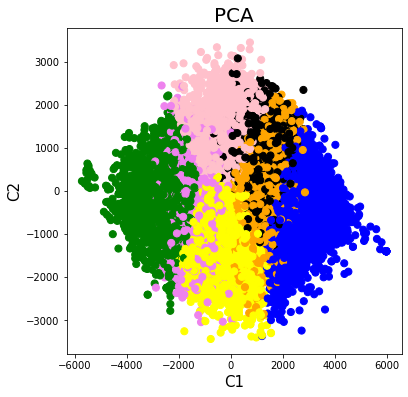

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('C1', fontsize = 15)
ax.set_ylabel('C2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

colors =  np.array(['blue', 'green', 'orange','pink','black','yellow','violet'])
ax.scatter(x=pca_emotions_clusters.C1, y=pca_emotions_clusters.C2, c=colors[pca_emotions_clusters.Label], s=50)
plt.show()

### Birch clustering

In [ ]:
from sklearn.cluster import Birch
#Se usa un threshold intermedio, ya que en las pruebas, ningún otro valor mostró diferencias. 
birch = Birch(n_clusters=7, compute_labels = True, branching_factor = 50, threshold = 0.5)
birch.fit(emotions_df)

result = birch.predict(emotions_df)

In [ ]:
from sklearn.decomposition import PCA
pca_b = PCA(n_components=2)
pca_emotions_b = pca_b.fit_transform(emotions_df)
pca_emotions_df_b =  pd.DataFrame(data= pca_emotions_b, columns=['C1','C2'])
pca_emotions_clusters_b = pd.concat([pca_emotions_df_b,  pd.DataFrame(result)],axis = 1)
pca_emotions_clusters_b = pca_emotions_clusters_b.rename({0: 'Label'}, axis=1)
pca_emotions_clusters_b.head()

,C1,C2,Label
0,701.059432,332.086209,3
1,-60.482652,-503.266113,2
2,-231.780172,-489.782303,0
3,-401.480258,1276.986797,0
4,1027.018325,1099.774399,1


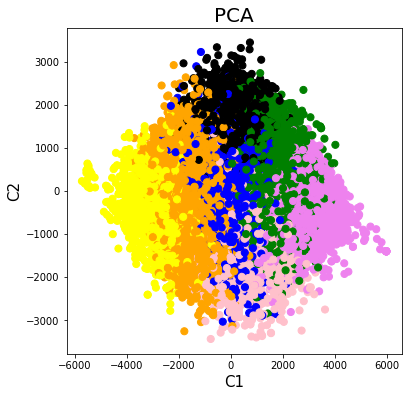

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('C1', fontsize = 15)
ax.set_ylabel('C2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

colors =  np.array(['blue', 'green', 'orange','pink','black','yellow','violet'])
ax.scatter(x=pca_emotions_clusters_b.C1, y=pca_emotions_clusters_b.C2, c=colors[pca_emotions_clusters_b.Label], s=50)
plt.show()

Nótese que aunque ambas hayan generado métodos del codo similares, se haya determinado de manera general, que el número adecuado de clúster es 7, por otro lado las gráficas los clúster al aplicar PCA, se ven distintas, ya que los grupos no parecen exactamente los mismos. 

En este punto, sería interesante tener los labels reales, pues podríamos comprobar cúan efectos han sido nuestros algoritmos y cuál de los dos hizo mejores predicciones. 

También, aquí podemos ver cómo se ven superpuestos algunos puntos, debido a la cantidad de dimensiones podríamos pensar que no, pero en realidad el hecho de la gráfica se muestre así, y que las métricas de silhouette dieran valores cercanas al 0,5 indica que puede que sí hayan clústers que se encuentren parcialmente encima de otros, sin embargo tampoco obtuvimos valores negativos. 